# Logistic Regression Project

Name: Kuwar Preetikumari Lalbahadur

Batch: DS3

## Problem statement

In this project, we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will  click on an ad based on the features of the user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on-site in minutes

'Age': customer age in years

'Area Income': Avg. Income of geographical area of consumer

'Daily Internet Usage': Avg. minutes a day consumer is on the internet

'Ad Topic Line': Headline of the advertisement

'City': City of consumer

'Male': Whether or not the consumer was male

'Country': Country of consumer

'Timestamp': Time at which consumer clicked on Ad or closed window

'Clicked on Ad': 0 or 1 indicated clicking on Ad

## EDA

In [1]:
## Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
## Reading data

ad_data=pd.read_csv(r"D:\DOWNLOADS\advertising.csv")
data=ad_data.copy()

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


In [4]:
## To know the data type and non-null count

ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
# There are no clomuns with any missing values. 

In [6]:
# duplicates checkup

ad_data.duplicated().sum() 

0

In [7]:
## We dont have any duplicate entries, all are unique. 

In [8]:
# assigning columns as numerical variables
numeric_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Assigning columns as categorical variables
Categorical_cols = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad' ]

In [9]:
## Summary Statistics

ad_data[numeric_cols].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


In [10]:
## Since the mean and median (50% percentile) are very similar, this shows that our data is not skewed.

In [11]:
# Summarizing Categorical Variables

ad_data[Categorical_cols].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Virtual scalable secured line,Lisamouth,France
freq,1,3,9


In [12]:
## Since we have many different cities, not many people belong to the same city.
## Also, The ad topic line are all unique, there is no duplicate ad.

In [13]:
## The following are countries, where people spend maximum time on internet usage

by_country=ad_data.groupby('Country')['Daily Internet Usage'].sum().sort_values(ascending=False).head(10)
by_country

Country
Czech Republic    1685.77
Peru              1507.41
Micronesia        1491.18
France            1478.08
Greece            1469.67
Liberia           1414.31
South Africa      1396.79
Burundi           1367.67
Luxembourg        1367.54
Senegal           1358.46
Name: Daily Internet Usage, dtype: float64

In [14]:
#Investing Country Variable according to clicked on ad

pd.crosstab(ad_data['Country'], ad_data['Clicked on Ad']).sort_values(1,ascending=False).head(10) 


Clicked on Ad,0,1
Country,,
Australia,1,7
Turkey,1,7
Ethiopia,0,7
Liberia,2,6
South Africa,2,6
Liechtenstein,0,6
Senegal,3,5
Peru,3,5
Mayotte,1,5


In [15]:
## The above obtained table tells us about number of customers from each country who clicked on ad and who didnt click on ad.
## For example the first row implies that from Australia we have 8 customers from which 1 didnot click on ad while other 7 users 
## clicked on ad.

In [16]:
## Getting Proportion of male and females in the given data

ad_data['Male'].value_counts(normalize=True)

0    0.519
1    0.481
Name: Male, dtype: float64

In [17]:
# It can be said that male and females are almost proportionate. 48% of them are Males while 52% being females.

In [18]:
## Checking whether the target is proportionate or not

ad_data['Clicked on Ad'].value_counts(normalize=True)

1    0.5
0    0.5
Name: Clicked on Ad, dtype: float64

In [19]:
# 50% of times the ads were clicked and 50% of times were left unseen. We have balanced distribution for target variable.

In [20]:
## Extract datetime variables using timestamp column

# Converting timestamp column into datatime object in order to extract new features
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

# Creates a new column called Month
ad_data['Month'] = ad_data['Timestamp'].dt.month

# Creates a new column called Day
ad_data['Day'] = ad_data['Timestamp'].dt.day

# Creates a new column called Hour
ad_data['Hour'] = ad_data['Timestamp'].dt.hour

# Creates a new column called Weekday with sunday as 6 and monday as 0
ad_data['Weekday'] = ad_data['Timestamp'].dt.dayofweek

# Dropping initial timestamp column 
ad_data = ad_data.drop(['Timestamp'], axis=1)
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,1,2,5
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,6,3,6


In [21]:
## Adding Column 'ad topic length' to the data frame

ad_data['ad topic length'] = ad_data['Ad Topic Line'].str.len()
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Month,Day,Hour,Weekday,ad topic length
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,0,6,34
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,1,0,34
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,20,6,32
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,1,2,5,37
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,6,3,6,29


In [22]:
## Checking correlation of features with target('Clicked on ad')

ad_data.corrwith(ad_data['Clicked on Ad'])

Daily Time Spent on Site   -0.748117
Age                         0.492531
Area Income                -0.476255
Daily Internet Usage       -0.786539
Male                       -0.038027
Clicked on Ad               1.000000
Month                       0.040387
Day                        -0.013611
Hour                       -0.047431
Weekday                    -0.064199
ad topic length             0.040425
dtype: float64

In [23]:
## There is good negative correlation between 'Clicked on ad' and 'Daily Time Spent on Site'.
## Also there is good negative correlation between 'Clicked on ad' and 'Daily Internet Usage'.
## There is considerable positive correlation between 'Clicked on ad' and 'Age'.
## There is considerable negative correlation between 'Clicked on ad' and 'Area Income'.
## All other added features can be considered to have no correlation with target.

## Data Visualization

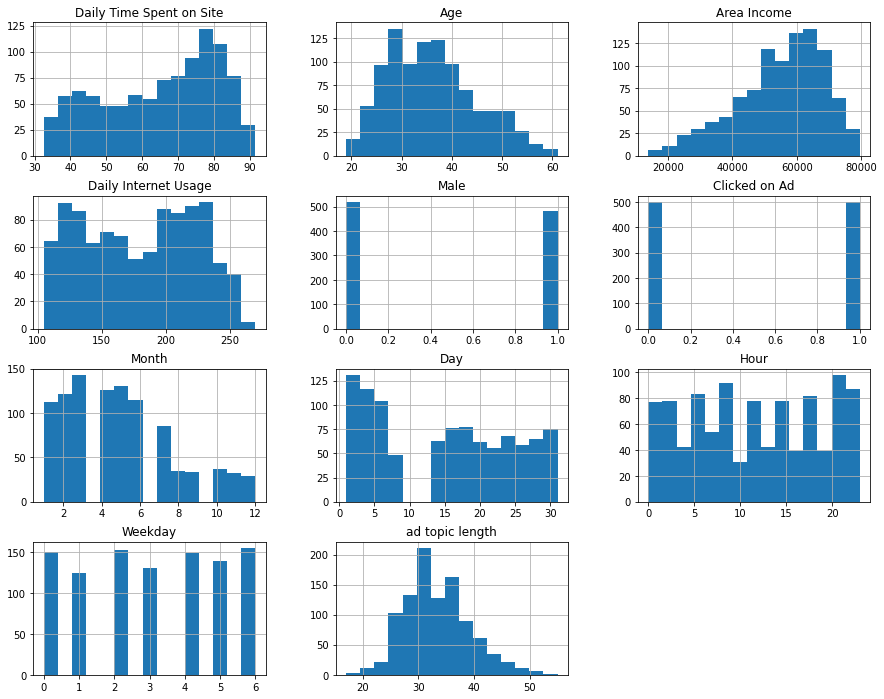

In [24]:
ad_data.hist(figsize=(15,12),bins = 15)
plt.title("Variable Distribution")
plt.show()

In [25]:
## We can clearly see that there are two peaks in the daily use of the website and the time spent every day. 
## This indicates that there are two different groups in our data.

## The proportion of male and female is similar. Also we have equal no. of people clicking on ad and not clicking on ad.

## Also, we have maximum observations for the first half year.

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

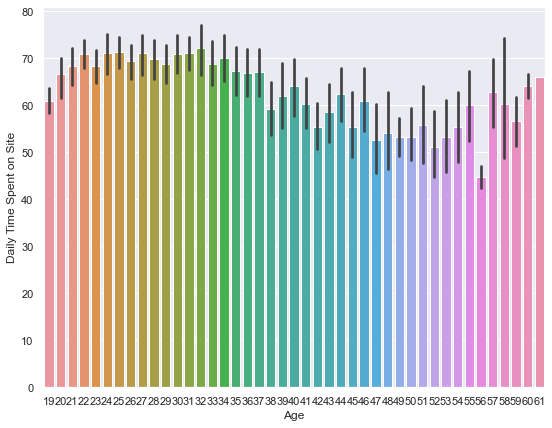

In [26]:
sns.set()
fig, ax = plt.subplots(figsize=(9, 7))
sns.barplot(x='Age',y='Daily Time Spent on Site',data=ad_data)

In [27]:
## min age = 19
## max age = 61
## People till age 37 spend more time on site than rest of the age group.

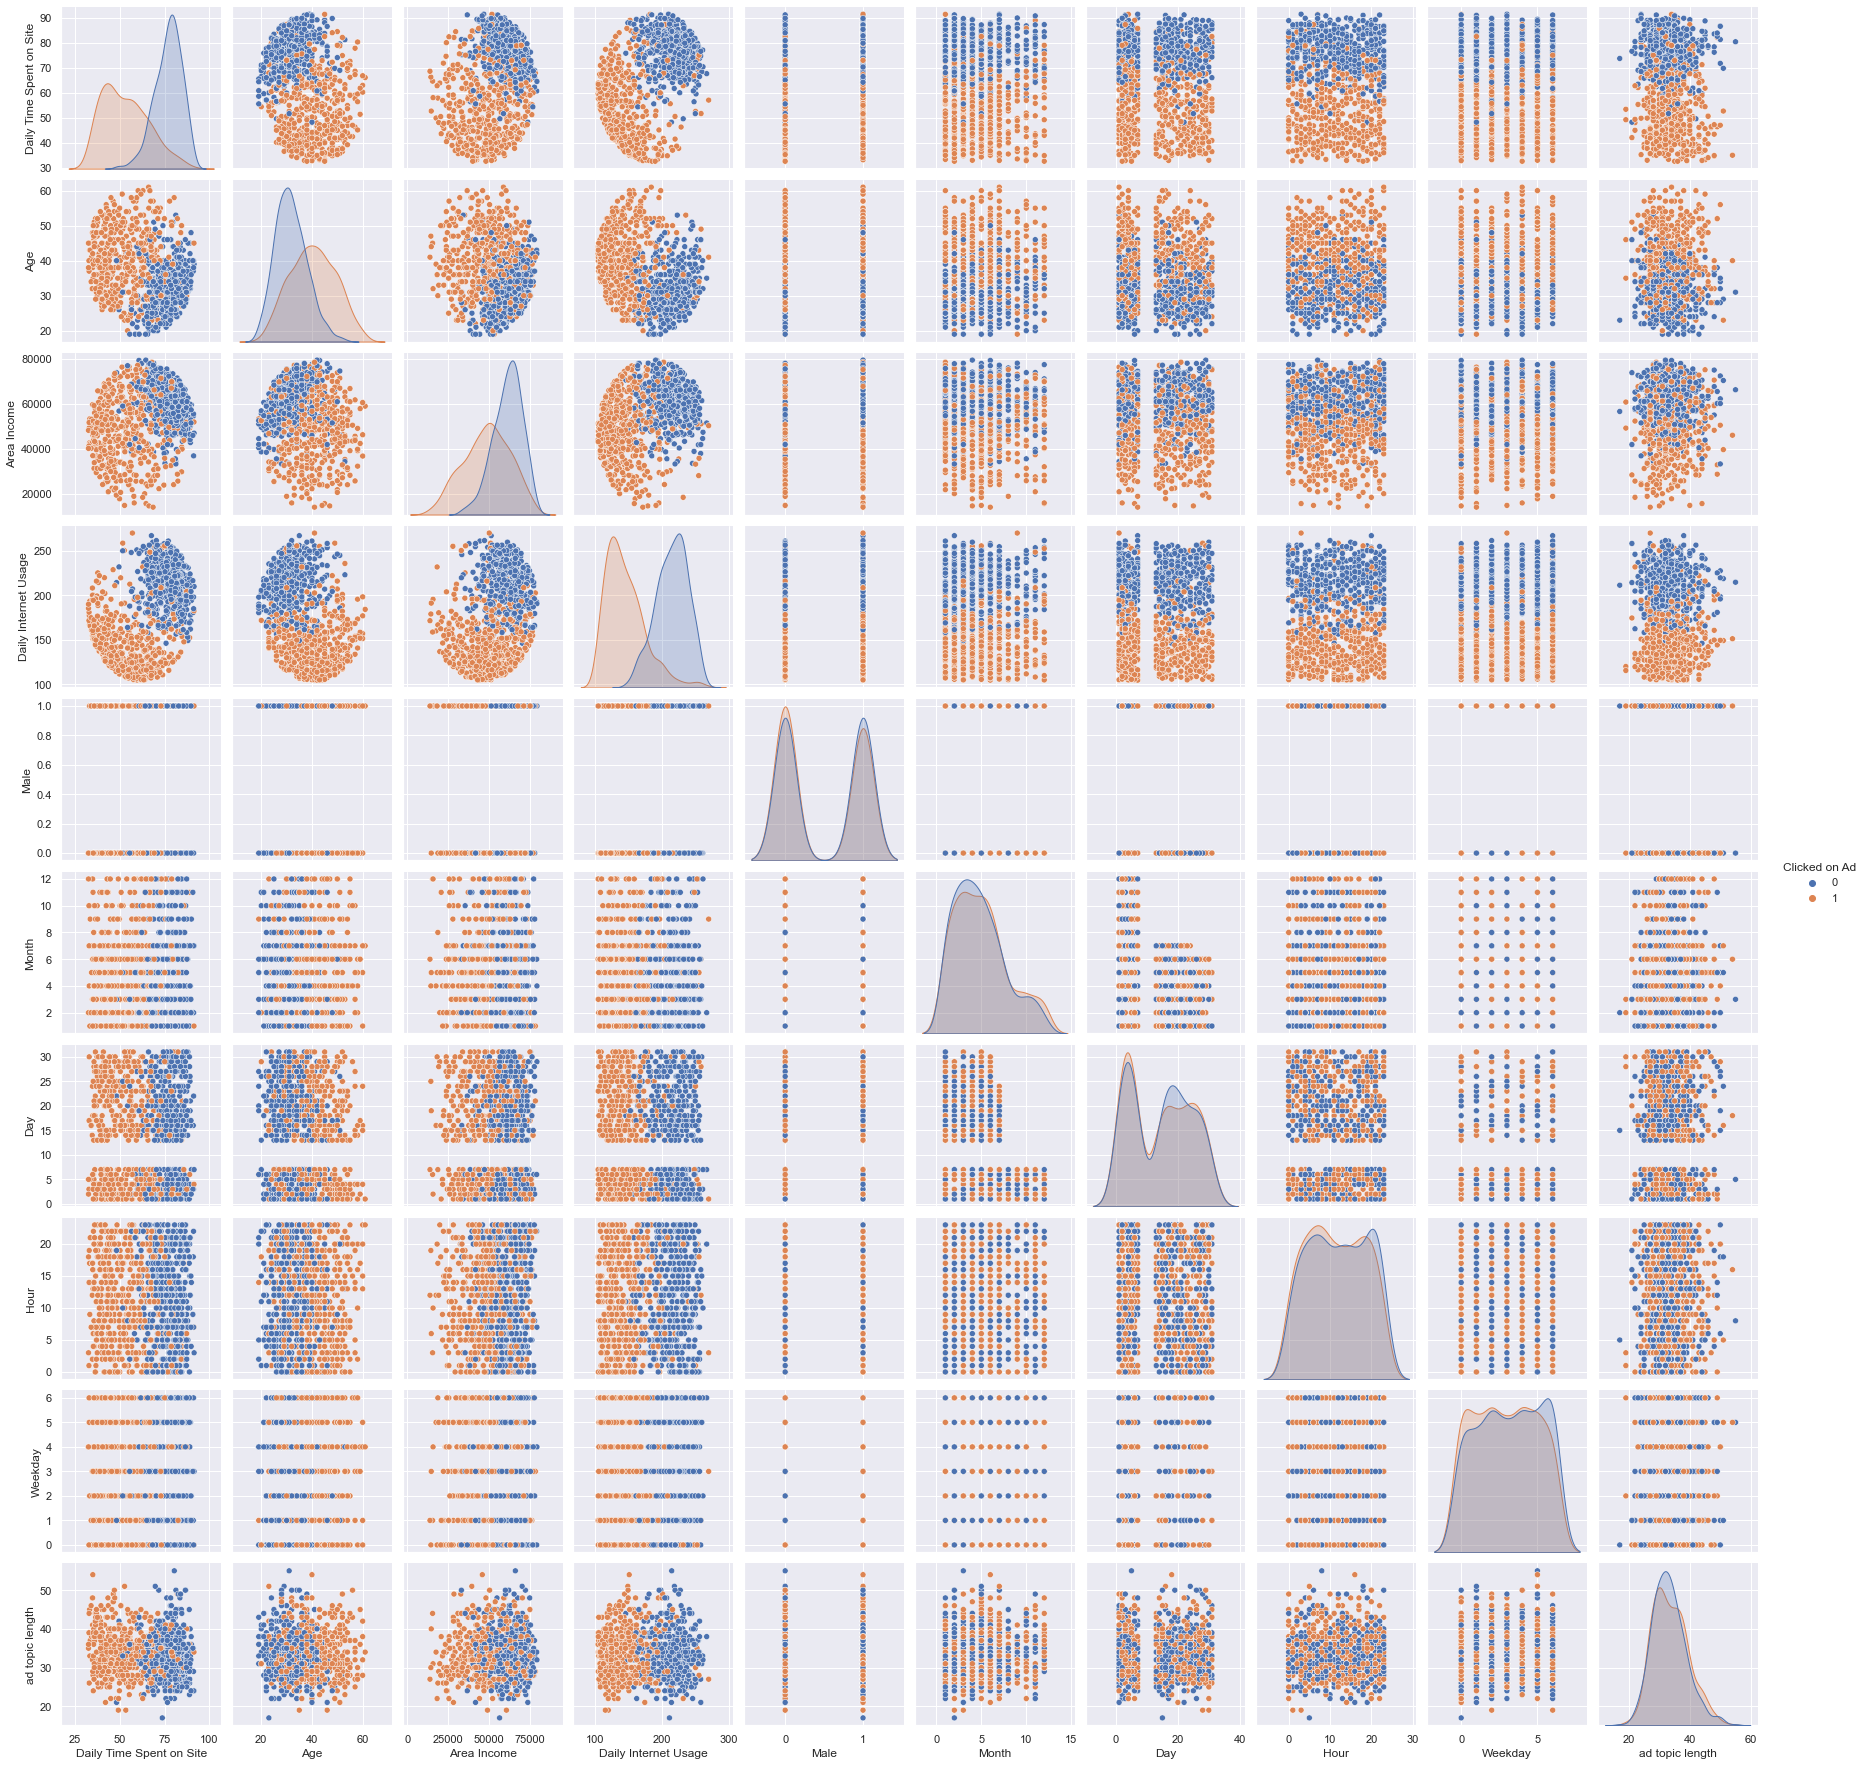

In [28]:
sns.pairplot(ad_data,hue='Clicked on Ad')

In [29]:
## People spending lesser time on site and on internet tend to click the ad frequently.
## All other variables can be considered unrelated towards clicking on ad.

<AxesSubplot:>

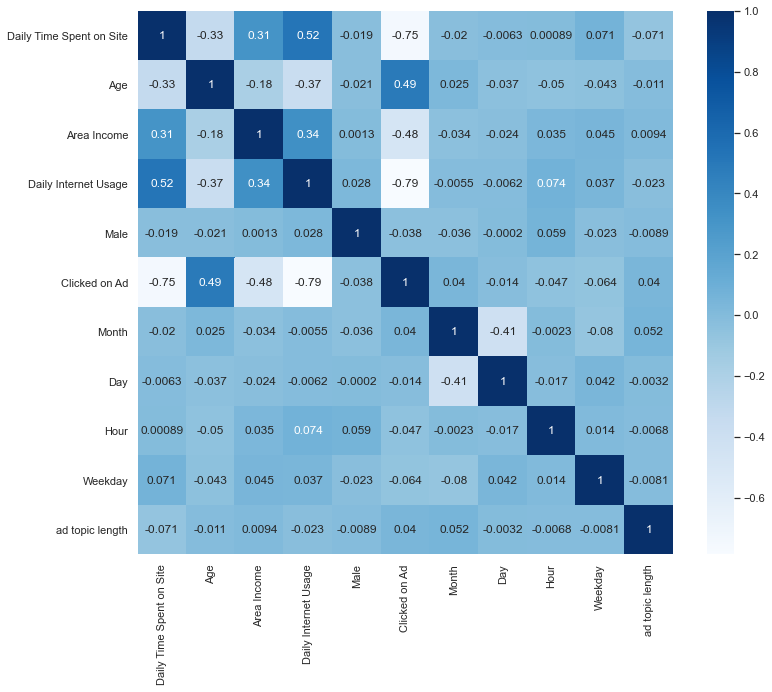

In [30]:
## Correlation between Variables

fig = plt.figure(figsize=(12,10))
sns.heatmap(ad_data.corr(), cmap='Blues', annot=True)

In [31]:
## The daily internet usage and the time spent on the website each day are more relevant to our target variables. 
## Likewise, none of the features seem to be correlated, which indicates that there is no collinearity in our data.

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Count'>

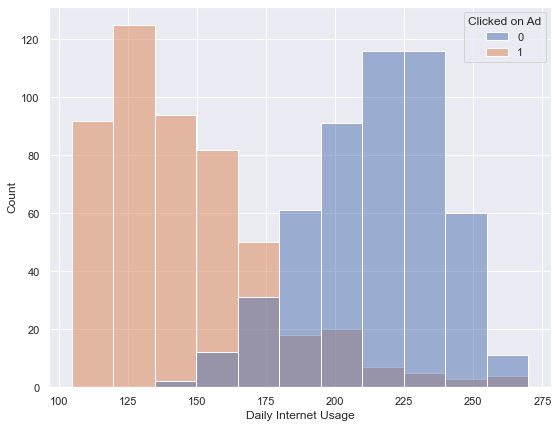

In [32]:
sns.set()
fig, ax = plt.subplots(figsize=(9, 7))
sns.histplot(data=ad_data,x='Daily Internet Usage',hue='Clicked on Ad')

In [33]:
## People spending more time on internet do not opt to click on ad.

<AxesSubplot:xlabel='Male'>

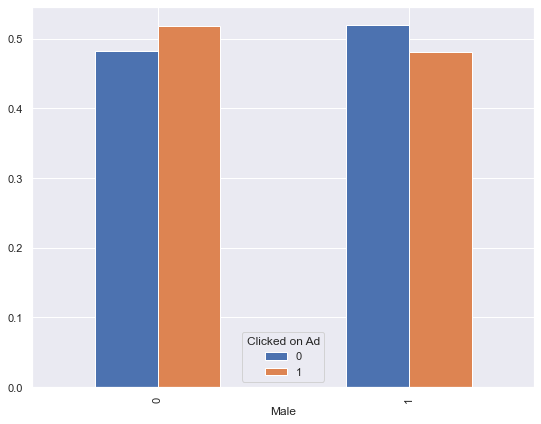

In [34]:
Gender = pd.crosstab(ad_data['Male'],ad_data['Clicked on Ad'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(9,7))

In [35]:
## Males tend to click on ad more often than females but difference is not much significant.

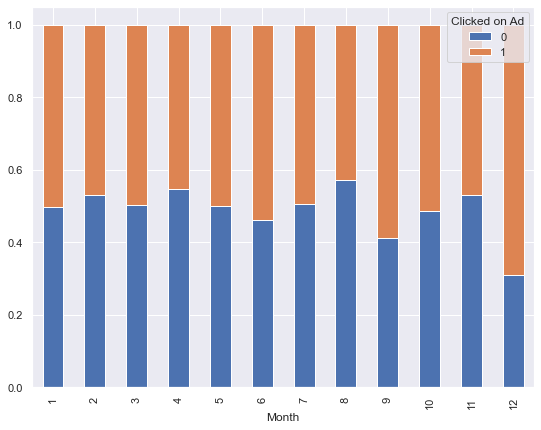

In [36]:
by_Month = pd.crosstab(ad_data['Month'],ad_data['Clicked on Ad'])
by_Month.div(by_Month.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(9,7))
plt.show()

In [37]:
## Most of the people clicked on ad in the month of December.

<AxesSubplot:xlabel='Weekday', ylabel='Daily Time Spent on Site'>

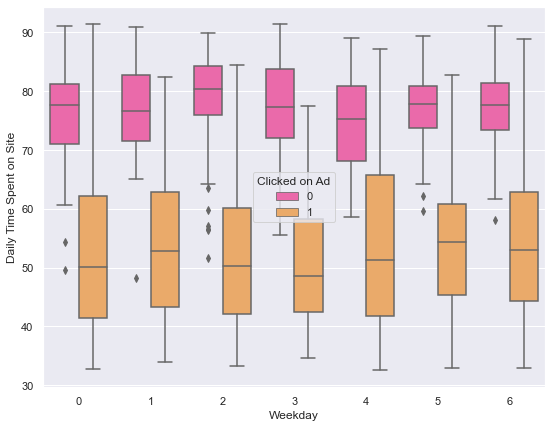

In [38]:
fig, ax = plt.subplots(figsize=(9,7))
sns.boxplot(x='Weekday', y='Daily Time Spent on Site', hue='Clicked on Ad', data=ad_data, palette='spring')

In [39]:
## The distribution of time spent on site for each day is almost similar.
## Even this graph indicates people spending less time on site do not prefer to click on ad.

## Applying Logistic Regression

In [40]:
## Removing unnecessary features
new_data=ad_data.drop(['Ad Topic Line','City'],axis=1)

## Coding the column country
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
new_data.Country=le.fit_transform(new_data.Country.values)

## y = Response = 'clicked on ad'
## x = features 
x=new_data.drop(['Clicked on Ad'],axis=1)
y=new_data['Clicked on Ad']

## Scaling the features
from sklearn import preprocessing
scalar=preprocessing.StandardScaler()
x=pd.DataFrame(scalar.fit_transform(x),columns=x.columns)

x.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Month,Day,Hour,Weekday,ad topic length
0,0.249267,-0.114905,0.509691,1.734030,-0.962695,1.424572,-0.648612,1.296977,-1.675896,1.461768,0.105592
1,0.961132,-0.570425,1.002530,0.313805,1.038750,0.451875,-0.303422,-1.074662,-1.532166,-1.501276,0.105592
2,0.282083,-1.139826,0.356949,1.287589,-0.962695,0.981136,-0.648612,-0.146629,1.198711,1.461768,-0.242897
3,0.577432,-0.798185,-0.014456,1.501580,1.038750,-0.177517,1.767717,-1.384006,-1.388436,0.967928,0.628326
4,0.212664,-0.114905,1.408868,1.038731,-0.962695,-0.277648,-0.648612,-0.868432,-1.244705,1.461768,-0.765631


In [41]:
## Splitting data in train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(700, 11) (300, 11) (700,) (300,)


In [42]:
## Applying Logistic regression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [43]:
# Confusion matrix

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[159,   3],
       [  4, 134]], dtype=int64)

In [44]:
## The Confusion matrix shows that only 7 observations were incorrectly predicted by the model. 

In [45]:
## Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred),"\n")

## Precision
print("Precision:",metrics.precision_score(y_test, y_pred),"\n")

## Recall
print("Recall:",metrics.recall_score(y_test, y_pred),"\n")


Accuracy: 0.9766666666666667 

Precision: 0.9781021897810219 

Recall: 0.9710144927536232 



In [46]:
## Accuracy: Overall,our classifier is correct 97.6% of times.
## Precision: Out of all the positive predicted, 97.8% is truly positive.
## Recall: Out of the total positive, 97.1% are predicted positive. It is the same as TPR.